[0.81386889 0.5034637  0.78732772 ... 0.93873062 0.1507185  0.00688166]
[0.79817799 0.33370955 0.94861569 ... 0.83249906 0.12957289 0.11210865]


<matplotlib.colorbar.Colorbar instance at 0x10fb6cea8>

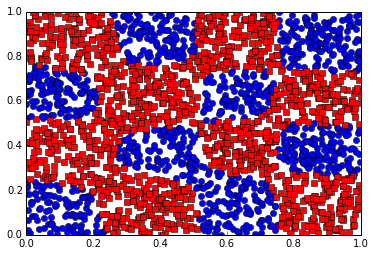

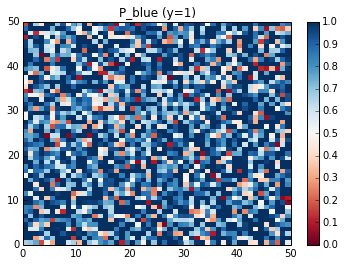

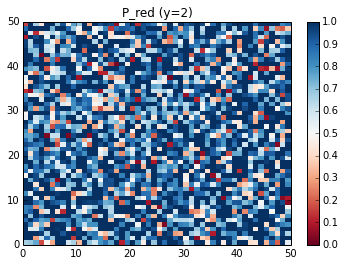

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
from math import log
import math
from pylab import *

# code from professor Ditzler
def gen_cb(N, a, alpha): 
    """
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians 
    """
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha), 
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 

#generate training dataset
X1, y1 = gen_cb(1000, .25, 0)
# using guassion as density estimation and train the dataset, bandwidth should less than width of checker bord
blue_GDE = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X1[np.where(y1==1)])
red_GDE= KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X1[np.where(y1==2)])
n_blue = len(X1[np.where(y1==1)]) 
n_red = len(X1[np.where(y1==2)])
#caculate prior log Probability for 2 class like P(y=1) or P(y=2) 
blue_prior_w0 = log(n_blue)-log(1000)
red_prior_w0 = log(n_red)-log(1000)
#generate testing data, and implement calssifier
X2, y2 = gen_cb(2500, .25, 0)
#get log density for each data and caculte its log probability (take off P(X) because both have P(X) as Denominator)
blue_logdensity_w = blue_GDE.score_samples(X2)
P_blue = blue_logdensity_w + blue_prior_w0
red_logdensity_w = red_GDE.score_samples(X2)
P_red= red_logdensity_w + red_prior_w0
#begin classifieer,  a>wt+w0>b--> a>b , using this relatinship do spilt
i = 0
while i < len(P_blue):
    if P_blue[i] > P_red[i]:
        y2[i] = 1
    else:
        y2[i] = 2
    i=i+1

#plot results
plt.figure()
plt.plot(X2[np.where(y2==1)[0], 0], X2[np.where(y2==1)[0], 1], 'o')
plt.plot(X2[np.where(y2==2)[0], 0], X2[np.where(y2==2)[0], 1], 's', c = 'r')


#plot P(X|Y=1), P(X|Y=2)
Py1=pow(math.e,blue_logdensity_w)
Py2=pow(math.e,red_logdensity_w)
#split blue and red class probality into 2 dimension array
matric1=np.array(Py1).reshape(50,50)
matric2=np.array(Py2).reshape(50,50)

#range of X and Y
xi = np.arange(0, 50)
yi = np.arange(0, 50)
X, Y = np.meshgrid(xi, yi)

#plot class P(X|y=1) and P(X|y=2)
plt.figure()
#plt.subplot(2, 2, 1)
plt.pcolor(matric1,cmap='RdBu',vmin=0, vmax=1)
plt.title('P_blue (y=1)')
# set the limits of the plot to the limits of the data
plt.axis([0, 50, 0, 50])
plt.colorbar()

plt.figure()
#plt.subplot(2, 2, 1)
plt.pcolor(matric1,cmap='RdBu',vmin=0, vmax=1)
plt.title('P_red (y=2)')
# set the limits of the plot to the limits of the data
plt.axis([0, 50, 0, 50])
plt.colorbar()
